# COGS 118A Project

### Members

Vince Rothenberg, A16534656, vrothenbergUCSD

Alden Yue, A15902882, aldenyue

Nil Beserler, A16312351, NilBeserler

Aryan Safari, A16091880, aryan3844

### Github

https://github.com/COGS118A/Group032-Wi23


# Data

## Diabetes 130-US hospitals for years 1999-2008 Data Set 

https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008

### Data Set Information:

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.

1. It is an inpatient encounter (a hospital admission).

2. It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

3. The length of stay was at least 1 day and at most 14 days.

4. Laboratory tests were performed during the encounter.

5. Medications were administered during the encounter.
The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

### Source:

The data are submitted on behalf of the Center for Clinical and Translational Research, Virginia Commonwealth University, a recipient of NIH CTSA grant UL1 TR00058 and a recipient of the CERNER data. John Clore (jclore '@' vcu.edu), Krzysztof J. Cios (kcios '@' vcu.edu), Jon DeShazo (jpdeshazo '@' vcu.edu), and Beata Strack (strackb '@' vcu.edu). This data is a de-identified abstract of the Health Facts database (Cerner Corporation, Kansas City, MO).

### Paper:

Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

https://www.hindawi.com/journals/bmri/2014/781670/



### Data download link:

https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip


In [1]:
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
# or: requests.get(url).content

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00296/dataset_diabetes.zip"

resp = urlopen(data_url)
zf = ZipFile(BytesIO(resp.read()))
diabetic_data, IDs_mapping = zf.namelist()


In [2]:
import pandas as pd

df = pd.read_csv(zf.open(diabetic_data))
df.shape

(101766, 50)

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
print('df.shape: ', df.shape)
# encounter_id column is unique
print('encounter_id unique count: ', df['encounter_id'].count())
# patient_nbr column is unique
print('patient_nbr unique count: ', df['patient_nbr'].count())

df.shape:  (101766, 50)
encounter_id unique count:  101766
patient_nbr unique count:  101766


In [6]:
# Patient race counts
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [7]:
# Clean race column, convert ? to Unknown
df['race'].replace({'?' : 'Unknown/Invalid'}, inplace=True)
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Unknown/Invalid     2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [8]:
# Patient gender counts
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [9]:
# Age group counts
df['age'].value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

In [10]:
# Clean age groups, convert to midpoint
ages = {
    '[90-100)' : 95,
    '[80-90)' : 85,
    '[70-80)' : 75,
    '[60-70)' : 65,
    '[50-60)' : 55,
    '[40-50)' : 45,
    '[30-40)' : 35,
    '[20-30)' : 25,
    '[10-20)' : 15,
    '[0-10)' : 5,
}

df['age'].replace(ages, inplace=True)
df['age'].value_counts()

75    26068
65    22483
55    17256
85    17197
45     9685
35     3775
95     2793
25     1657
15      691
5       161
Name: age, dtype: int64

In [11]:
# Weight column mostly useless
df['weight'].value_counts()
df.drop(labels=['weight'], axis=1, inplace=True)

In [12]:
# Admission type ID counts
df['admission_type_id'].value_counts()

1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

In [13]:
# Convert Admission type ID to text category
# From IDs_mapping.csv
admission_type_id_mapping = {
  1:	'Emergency',
  2:	'Urgent',
  3:	'Elective',
  4:	'Newborn',
  5:	'Not Available',
  6:	'NULL',
  7:	'Trauma Center',
  8:	'Not Mapped',
}
# New column admission_type
df['admission_type'] = df['admission_type_id'].replace(admission_type_id_mapping)
df['admission_type'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: admission_type, dtype: int64

In [14]:
# Discharge disposition
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [15]:
# Convert Discharge disposition ID to text category
# From IDs_mapping.csv
discharge_disposition_id_mapping = {
  1:	'Discharged to home',
  2:	'Discharged/transferred to another short term hospital',
  3:	'Discharged/transferred to SNF',
  4:	'Discharged/transferred to ICF',
  5:	'Discharged/transferred to another type of inpatient care institution',
  6:	'Discharged/transferred to home with home health service',
  7:	'Left AMA',
  8:	'Discharged/transferred to home under care of Home IV provider',
  9:	'Admitted as an inpatient to this hospital',
  10:	'Neonate discharged to another hospital for neonatal aftercare',
  11:	'Expired',
  12:	'Still patient or expected to return for outpatient services',
  13:	'Hospice / home',
  14:	'Hospice / medical facility',
  15:	'Discharged/transferred within this institution to Medicare approved swing bed',
  16:	'Discharged/transferred/referred another institution for outpatient services',
  17:	'Discharged/transferred/referred to this institution for outpatient services',
  18:	'NULL',
  19:	'Expired at home. Medicaid only, hospice.',
  20:	'Expired in a medical facility. Medicaid only, hospice.',
  21:	'Expired, place unknown. Medicaid only, hospice.',
  22:	'Discharged/transferred to another rehab fac including rehab units of a hospital .',
  23:	'Discharged/transferred to a long term care hospital.',
  24:	'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
  25:	'Not Mapped',
  26:	'Unknown/Invalid',
  30:	'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
  27:	'Discharged/transferred to a federal health care facility.',
  28:	'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
  29:	'Discharged/transferred to a Critical Access Hospital (CAH).',
}
# New column admission_type
df['discharge_disposition'] = df['discharge_disposition_id'].replace(discharge_disposition_id_mapping)
df['discharge_disposition'].value_counts()

Discharged to home                                                                                           60234
Discharged/transferred to SNF                                                                                13954
Discharged/transferred to home with home health service                                                      12902
NULL                                                                                                          3691
Discharged/transferred to another short term hospital                                                         2128
Discharged/transferred to another rehab fac including rehab units of a hospital .                             1993
Expired                                                                                                       1642
Discharged/transferred to another type of inpatient care institution                                          1184
Not Mapped                                                                      

In [16]:
def discharge_disposition_id_grouping(row):
  id = row['discharge_disposition_id']
  # Home
  home = [1,7]
  if id in home:
    return 0

  # Hospice / Expired
  dead = [11, 13, 14, 19, 20, 21]
  if id in dead:
    return 1

  # Transfer to hospital
  transfer = [2,3,4,5,6,8,9,10,12,15,16,17,22,23,24,27,28,29]
  if id in transfer:
    return 2

  # Unknown 
  other = [18,25,26]
  if id in other:
    return 3

df['discharge_disposition_id_group'] = df.apply (lambda row: discharge_disposition_id_grouping(row), axis=1)
df['discharge_disposition_id_group'] 


0         3
1         0
2         0
3         0
4         0
         ..
101761    2
101762    2
101763    0
101764    2
101765    0
Name: discharge_disposition_id_group, Length: 101766, dtype: int64

In [17]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_type', 'discharge_disposition',
       'discharge_disposition_id_group'],
      dtyp

In [18]:
# admission_source_id
df['admission_source_id'].value_counts()

7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [19]:
# Convert Admission source id to text category
# From IDs_mapping.csv
admission_source_id_mapping = {
  1:	 'Physician Referral',
  2:	 'Clinic Referral',
  3:	 'HMO Referral',
  4:	 'Transfer from a hospital',
  5:	 'Transfer from a Skilled Nursing Facility (SNF)',
  6:	 'Transfer from another health care facility',
  7:	 'Emergency Room',
  8:	 'Court/Law Enforcement',
  9:	 'Not Available',
  10:	 'Transfer from critial access hospital',
  11:	 'Normal Delivery',
  12:	 'Premature Delivery',
  13:	 'Sick Baby',
  14:	 'Extramural Birth',
  15:	 'Not Available',
  17:	 'NULL',
  18:	 'Transfer From Another Home Health Agency',
  19:	 'Readmission to Same Home Health Agency',
  20:	 'Not Mapped',
  21:	 'Unknown/Invalid',
  22:	 'Transfer from hospital inpt/same fac reslt in a sep claim',
  23:	 'Born inside this hospital',
  24:	 'Born outside this hospital',
  25:	 'Transfer from Ambulatory Surgery Center',
  26:	 'Transfer from Hospice',
}

# New column admission_type
df['admission_source'] = df['admission_source_id'].replace(admission_source_id_mapping)
df['admission_source'].value_counts()

Emergency Room                                               57494
Physician Referral                                           29565
NULL                                                          6781
Transfer from a hospital                                      3187
Transfer from another health care facility                    2264
Clinic Referral                                               1104
Transfer from a Skilled Nursing Facility (SNF)                 855
HMO Referral                                                   187
Not Mapped                                                     161
Not Available                                                  125
Court/Law Enforcement                                           16
Transfer from hospital inpt/same fac reslt in a sep claim       12
Transfer from critial access hospital                            8
Extramural Birth                                                 2
Normal Delivery                                               

In [20]:
# Time in hospital (days)
df['time_in_hospital'].value_counts()

3     17756
2     17224
1     14208
4     13924
5      9966
6      7539
7      5859
8      4391
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


<AxesSubplot:>

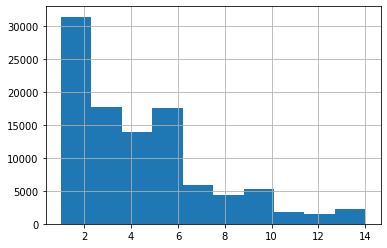

In [21]:
print(df['time_in_hospital'].describe())
df['time_in_hospital'].hist()

In [22]:
df['payer_code'].value_counts()

?     40256
MC    32439
HM     6274
SP     5007
BC     4655
MD     3532
CP     2533
UN     2448
CM     1937
OG     1033
PO      592
DM      549
CH      146
WC      135
OT       95
MP       79
SI       55
FR        1
Name: payer_code, dtype: int64

In [23]:
df['medical_specialty'].value_counts()

?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [24]:
# Replace low frequency categories
mask = df['medical_specialty'].value_counts()
thresh = 300
outlier_index = df['medical_specialty'].isin(mask.index[mask<thresh])
df.loc[outlier_index, 'medical_specialty'] = 'Other'
df['medical_specialty'].replace('?', 'Other', inplace=True)
df['medical_specialty'].value_counts()

Other                                52252
InternalMedicine                     14635
Emergency/Trauma                      7565
Family/GeneralPractice                7440
Cardiology                            5352
Surgery-General                       3099
Nephrology                            1613
Orthopedics                           1400
Orthopedics-Reconstructive            1233
Radiologist                           1140
Pulmonology                            871
Psychiatry                             854
Urology                                685
ObstetricsandGynecology                671
Surgery-Cardiovascular/Thoracic        652
Gastroenterology                       564
Surgery-Vascular                       533
Surgery-Neuro                          468
PhysicalMedicineandRehabilitation      391
Oncology                               348
Name: medical_specialty, dtype: int64

count    101766.000000
mean         43.095641
std          19.674362
min           1.000000
25%          31.000000
50%          44.000000
75%          57.000000
max         132.000000
Name: num_lab_procedures, dtype: float64


<AxesSubplot:>

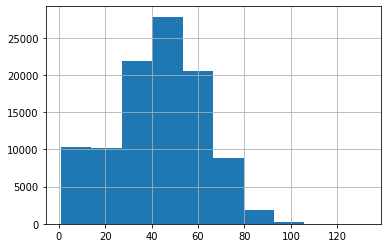

In [25]:
print(df['num_lab_procedures'].describe())
df['num_lab_procedures'].hist()

0    46652
1    20742
2    12717
3     9443
6     4954
4     4180
5     3078
Name: num_procedures, dtype: int64
count    101766.000000
mean          1.339730
std           1.705807
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: num_procedures, dtype: float64


<AxesSubplot:>

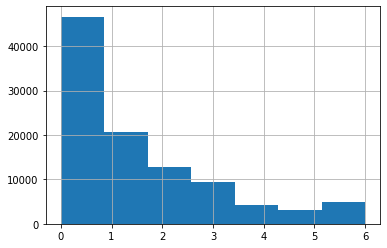

In [26]:
print(df['num_procedures'].value_counts())
print(df['num_procedures'].describe())
df['num_procedures'].hist(bins=7)

count    101766.000000
mean         16.021844
std           8.127566
min           1.000000
25%          10.000000
50%          15.000000
75%          20.000000
max          81.000000
Name: num_medications, dtype: float64


<AxesSubplot:>

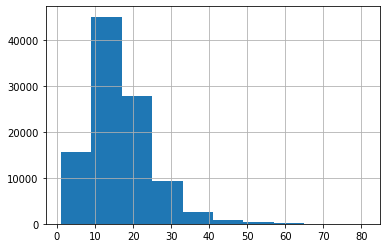

In [27]:
print(df['num_medications'].describe())
df['num_medications'].hist()

count    101766.000000
mean          0.369357
std           1.267265
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          42.000000
Name: number_outpatient, dtype: float64


<AxesSubplot:>

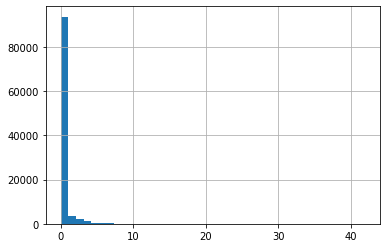

In [28]:
print(df['number_outpatient'].describe())
df['number_outpatient'].hist(bins=40)

count    101766.000000
mean          0.197836
std           0.930472
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          76.000000
Name: number_emergency, dtype: float64


<AxesSubplot:>

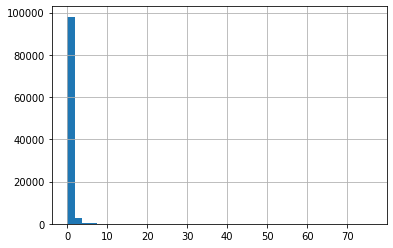

In [29]:
print(df['number_emergency'].describe())
df['number_emergency'].hist(bins=40)

count    101766.000000
mean          0.635566
std           1.262863
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          21.000000
Name: number_inpatient, dtype: float64


<AxesSubplot:>

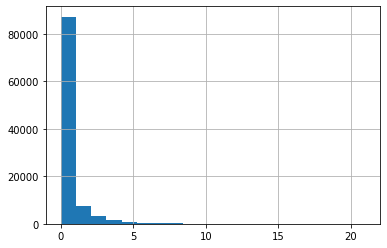

In [30]:
print(df['number_inpatient'].describe())
df['number_inpatient'].hist(bins=20)

In [31]:
# The primary diagnosis (coded as first three digits of ICD9)
df['diag_1'].value_counts()

428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
373       1
314       1
684       1
217       1
V51       1
Name: diag_1, Length: 717, dtype: int64

In [32]:
icd9_url = "https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/Downloads/ICD-9-CM-v32-master-descriptions.zip"
resp = urlopen(icd9_url)
zf = ZipFile(BytesIO(resp.read()))
zf.namelist()

['CMS32_DESC_LONG_DX.txt',
 'CMS32_DESC_LONG_SG.txt',
 'CMS32_DESC_LONG_SHORT_DX.xlsx',
 'CMS32_DESC_LONG_SHORT_SG.xlsx',
 'CMS32_DESC_SHORT_DX.txt',
 'CMS32_DESC_SHORT_SG.txt']

In [33]:
icd9_codes = 'CMS32_DESC_LONG_SHORT_DX.xlsx'
icd9 = pd.read_excel(zf.open(icd9_codes))
icd9.shape

(14567, 3)

In [34]:
icd9.loc[icd9['DIAGNOSIS CODE'].str.startswith('786')].iloc[0]

DIAGNOSIS CODE                                      78600
LONG DESCRIPTION     Respiratory abnormality, unspecified
SHORT DESCRIPTION                  Respiratory abnorm NOS
Name: 9318, dtype: object

In [35]:
icd9_mapping_long = {}
icd9_mapping_short = {}

for row in icd9.itertuples():
  index, code, long_desc, short_desc = row
  code3 = code.lstrip('0')[:3]
  if code3 not in icd9_mapping_long:
    icd9_mapping_long[code3] = long_desc
  if code3 not in icd9_mapping_short:
    icd9_mapping_short[code3] = short_desc


In [36]:
df['diag_1_code3'] = df['diag_1'].str.lstrip('0').str[:3]
df['diag_1_desc_long'] = df['diag_1_code3'].map(icd9_mapping_long)
df[['diag_1', 'diag_1_desc_long']]

,diag_1,diag_1_desc_long
0,250.83,Diabetes mellitus without mention of complicat...
1,276,Hyperosmolality and/or hypernatremia
2,648,"Diabetes mellitus of mother, complicating preg..."
3,8,NaN
4,197,Secondary malignant neoplasm of lung
...,...,...
101761,250.13,Diabetes mellitus without mention of complicat...
101762,560,Rubella with unspecified neurological complica...
101763,38,Other specified salmonella infections
101764,996,Mechanical complication of unspecified cardiac...


In [37]:
df['diag_1_desc_long'].value_counts()

Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled        8757
Congestive heart failure, unspecified                                                                             6862
Shiga toxin-producing Escherichia coli [E. coli] (STEC) O157                                                      6581
Hemorrhagic nephrosonephritis                                                                                     4016
Streptococcus infection in conditions classified elsewhere and of unspecified site, streptococcus, unspecified    3614
                                                                                                                  ... 
Benign neoplasm of skin of lip                                                                                       1
Eye globe replaced by other means                                                                                    1
Other specified rickettsioses                   

In [38]:
df['diag_2_code3'] = df['diag_2'].str.lstrip('0').str[:3]
df['diag_2_desc_long'] = df['diag_2_code3'].map(icd9_mapping_long)
df['diag_2_desc_long'].value_counts()

Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled    12794
Hyperosmolality and/or hypernatremia                                                                           6752
Congestive heart failure, unspecified                                                                          6662
Paroxysmal supraventricular tachycardia                                                                        5036
Rhinoscleroma                                                                                                  3736
                                                                                                              ...  
Viral hepatitis B with hepatic coma, acute or unspecified, without mention of hepatitis delta                     1
Tuberculosis of lung, nodular, unspecified                                                                        1
Poisoning by dietetics                                                  

In [39]:
df['diag_3_code3'] = df['diag_3'].str.lstrip('0').str[:3]
df['diag_3_desc_long'] = df['diag_3_code3'].map(icd9_mapping_long)
df['diag_3_desc_long'].value_counts()

Diabetes mellitus without mention of complication, type II or unspecified type, not stated as uncontrolled    17157
Rhinoscleroma                                                                                                  8289
Hyperosmolality and/or hypernatremia                                                                           5175
Congestive heart failure, unspecified                                                                          4577
Paroxysmal supraventricular tachycardia                                                                        3955
                                                                                                              ...  
Malignant neoplasm of head, face, and neck                                                                        1
Open wound of external ear, unspecified site, without mention of complication                                     1
Bronchopneumonia, organism unspecified                                  

In [40]:
# One hot encode
df['max_glu_serum'].value_counts()

None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

In [41]:
df['A1Cresult'].value_counts()

None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

In [42]:
df['metformin'].value_counts()

No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [43]:
#drop useless columns
df.drop(labels=[ 'encounter_id', 'patient_nbr', 'payer_code'], axis=1, inplace=True)
pd.set_option('display.max_columns', None)
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,discharge_disposition_id_group,admission_source,diag_1_code3,diag_1_desc_long,diag_2_code3,diag_2_desc_long,diag_3_code3,diag_3_desc_long
0,Caucasian,Female,5,6,25,1,1,Other,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NULL,Not Mapped,3,Physician Referral,250,Diabetes mellitus without mention of complicat...,?,NaN,?,NaN
1,Caucasian,Female,15,1,1,7,3,Other,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,0,Emergency Room,276,Hyperosmolality and/or hypernatremia,250,Diabetes mellitus without mention of complicat...,255,Cushing's syndrome
2,AfricanAmerican,Female,25,1,1,7,2,Other,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,0,Emergency Room,648,"Diabetes mellitus of mother, complicating preg...",250,Diabetes mellitus without mention of complicat...,V27,"Outcome of delivery, single liveborn"
3,Caucasian,Male,35,1,1,7,2,Other,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,8,NaN,250,Diabetes mellitus without mention of complicat...,403,Necrobacillosis
4,Caucasian,Male,45,1,1,7,1,Other,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,197,Secondary malignant neoplasm of lung,157,"Tuberculosis of other specified bone, unspecified",250,Diabetes mellitus without mention of complicat...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,1,3,7,3,Other,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,2,Emergency Room,250,Diabetes mellitus without mention of complicat...,291,Alcohol withdrawal delirium,458,Orthostatic hypotension
101762,AfricanAmerican,Female,85,1,4,5,5,Other,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,2,Transfer from a Skilled Nursing Facility (SNF),560,Rubella with unspecified neurological complica...,276,Hyperosmolality and/or hypernatremia,787,Arenaviral hemorrhagic fever
101763,Caucasian,Male,75,1,1,7,1,Other,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,38,Other specified salmonella infections,590,"Orthopoxvirus infection, unspecified",296,"Bipolar I disorder, single manic episode, unsp..."
101764,Caucasian,Female,85,2,3,7,10,Surgery-General,45,2,21,0,0,1,996,285,998,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Urgent,Discharged/transferred to SNF,2,Emergency Room,996,Mechanical complication of unspecified cardiac...,285,Sideroblastic anemia,998,Other specified 

In [44]:
import math

diag_code_to_category_map = {
    0: "Circulatory",
    1: "Respiratory",
    2: "Digestive",
    3: "Diabetes",
    4: "Injury",
    5: "Musculoskeletal",
    6: "Genitourinary",
    7: "Neoplasms",
    8: "Other",
    9: "No Diagnosis"
}

def diag_to_diag_type(row, column):
  id = row[column]

  #no Diagnosis
  if id == "?":
    return 9

  try:
    id = float(id)
  except ValueError:
    return 8
 

  # Circulatory
  if (id >= 390 and id <= 459) or id == 785:
    return 0

  # Respiratory
  if (id >= 460 and id <= 519) or id == 786:
    return 1

  # Digestive
  if (id >= 520 and id <= 579) or id == 787:
    return 2

  # Diabetes 
  if math.floor(id) == 250.0 :
    return 3
  
  #Injury
  if (id >= 800 and id <=999 ):
    return 4

  # Musculoskeletal
  if (id >= 710 and id <= 739 ):
    return 5
  
  # Genitourinary
  if (id >= 580 and id <= 629 ) or id == 788:
    return 6
  
  # Neoplasms

  if (id >= 140 and id <= 239):
    return 7
  #other
  return 8

df['diag_1_type'] = df.apply (lambda row: diag_to_diag_type(row, 'diag_1_code3'), axis=1)
df['diag_1_type'].value_counts()
df['diag_1_category'] = df['diag_1_type'].map(diag_code_to_category_map)


In [45]:
df['diag_2_type'] = df.apply (lambda row: diag_to_diag_type(row, 'diag_2_code3'), axis=1)
df['diag_2_type'].value_counts()
df['diag_2_category'] = df['diag_2_type'].map(diag_code_to_category_map)

In [46]:
df['diag_3_type'] = df.apply (lambda row: diag_to_diag_type(row, 'diag_3_code3'), axis=1)
df['diag_3_type'].value_counts()
df['diag_3_category'] = df['diag_3_type'].map(diag_code_to_category_map)

In [47]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_type,discharge_disposition,discharge_disposition_id_group,admission_source,diag_1_code3,diag_1_desc_long,diag_2_code3,diag_2_desc_long,diag_3_code3,diag_3_desc_long,diag_1_type,diag_1_category,diag_2_type,diag_2_category,diag_3_type,diag_3_category
0,Caucasian,Female,5,6,25,1,1,Other,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,NULL,Not Mapped,3,Physician Referral,250,Diabetes mellitus without mention of complicat...,?,NaN,?,NaN,3,Diabetes,9,No Diagnosis,9,No Diagnosis
1,Caucasian,Female,15,1,1,7,3,Other,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged to home,0,Emergency Room,276,Hyperosmolality and/or hypernatremia,250,Diabetes mellitus without mention of complicat...,255,Cushing's syndrome,8,Other,3,Diabetes,8,Other
2,AfricanAmerican,Female,25,1,1,7,2,Other,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency,Discharged to home,0,Emergency Room,648,"Diabetes mellitus of mother, complicating preg...",250,Diabetes mellitus without mention of complicat...,V27,"Outcome of delivery, single liveborn",8,Other,3,Diabetes,8,Other
3,Caucasian,Male,35,1,1,7,2,Other,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,8,NaN,250,Diabetes mellitus without mention of complicat...,403,Necrobacillosis,8,Other,3,Diabetes,0,Circulatory
4,Caucasian,Male,45,1,1,7,1,Other,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,197,Secondary malignant neoplasm of lung,157,"Tuberculosis of other specified bone, unspecified",250,Diabetes mellitus without mention of complicat...,7,Neoplasms,7,Neoplasms,3,Diabetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,1,3,7,3,Other,51,0,16,0,0,0,250.13,291,458,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency,Discharged/transferred to SNF,2,Emergency Room,250,Diabetes mellitus without mention of complicat...,291,Alcohol withdrawal delirium,458,Orthostatic hypotension,3,Diabetes,8,Other,0,Circulatory
101762,AfricanAmerican,Female,85,1,4,5,5,Other,33,3,18,0,0,1,560,276,787,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Emergency,Discharged/transferred to ICF,2,Transfer from a Skilled Nursing Facility (SNF),560,Rubella with unspecified neurological complica...,276,Hyperosmolality and/or hypernatremia,787,Arenaviral hemorrhagic fever,2,Digestive,8,Other,2,Digestive
101763,Caucasian,Male,75,1,1,7,1,Other,53,0,9,1,0,0,38,590,296,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency,Discharged to home,0,Emergency Room,38,Other specified salmonella infections,590,"Orthopoxvirus infection, unspecified",296,"Bipolar I disorder, single manic episode, uns

In [48]:
X_df = df.copy()
X_df.drop(labels=['discharge_disposition', 'discharge_disposition_id_group', 'admission_type', 'diag_1', 'diag_2', 'diag_3', 'diag_1_code3', 'diag_1_desc_long', 'diag_2_code3',
       'diag_2_desc_long', 'diag_3_code3', 'diag_3_desc_long', 'diag_1_category', 'diag_2_category', 'diag_3_category'], axis=1, inplace=True)
y_df = df['discharge_disposition_id_group']

In [49]:
X_df.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source', 'diag_1_type', 'diag_2_type', 'diag_3_type'],
      dtype='object')

In [50]:
X_df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,admission_source,diag_1_type,diag_2_type,diag_3_type
0,Caucasian,Female,5,6,25,1,1,Other,41,0,1,0,0,0,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO,Physician Referral,3,9,9
1,Caucasian,Female,15,1,1,7,3,Other,59,0,18,0,0,0,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30,Emergency Room,8,3,8
2,AfricanAmerican,Female,25,1,1,7,2,Other,11,5,13,2,0,1,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO,Emergency Room,8,3,8
3,Caucasian,Male,35,1,1,7,2,Other,44,1,16,0,0,0,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,8,3,0
4,Caucasian,Male,45,1,1,7,1,Other,51,0,8,0,0,0,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO,Emergency Room,7,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,75,1,3,7,3,Other,51,0,16,0,0,0,9,None,>8,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,>30,Emergency Room,3,8,0
101762,AfricanAmerican,Female,85,1,4,5,5,Other,33,3,18,0,0,1,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,NO,Transfer from a Skilled Nursing Facility (SNF),2,8,2
101763,Caucasian,Male,75,1,1,7,1,Other,53,0,9,1,0,0,13,None,None,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Down,No,No,No,No,No,Ch,Yes,NO,Emergency Room,8,6,8
101764,Caucasian,Female,85,2,3,7,10,Surgery-General,45,2,21,0,0,1,9,None,None,No,No,No,No,No,No,Steady,No,No,Steady,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO,Emergency Room,4,8,4


In [51]:
y_df

0         3
1         0
2         0
3         0
4         0
         ..
101761    2
101762    2
101763    0
101764    2
101765    0
Name: discharge_disposition_id_group, Length: 101766, dtype: int64

In [52]:
# Binarize y
# 0 if discharged to home, else 1
y_binarized = y_df.copy()
y_binarized = (y_binarized == 0).astype(int)
y_binarized

0         0
1         1
2         1
3         1
4         1
         ..
101761    0
101762    0
101763    1
101764    0
101765    1
Name: discharge_disposition_id_group, Length: 101766, dtype: int64

In [53]:
# Model Selection

from sklearn.metrics import accuracy_score, f1_score, balanced_accuracy_score, roc_auc_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

categorical_cols = ['race', 'gender', 'admission_type_id',
       'admission_source_id',
       'medical_specialty',
       'num_medications',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'diag_1_type', 'diag_2_type', 'diag_3_type']

numerical_cols = ['age',  'time_in_hospital',
       'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses']


X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_binarized, test_size=0.1, random_state=42)

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


logistic_model = LogisticRegression(solver='saga', max_iter=1000, C=0.1, verbose=1)

# rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', logistic_model)
                             ])

scores = cross_val_score(my_pipeline, X_train, y_train, scoring='f1', verbose=1)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Evaluate the model
# score = mean_absolute_error(y_valid, preds)
f1 = f1_score(y_test, preds)
print('F1:', f1)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 424 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 492 epochs took 32 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 449 epochs took 29 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 507 epochs took 33 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 499 epochs took 34 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   33.4s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 486 epochs took 42 seconds
F1: 0.7872273654479837


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.7s finished


In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.1, random_state=42)

multinomial_model = LogisticRegression(multi_class='ovr', solver='lbfgs', C=0.1, verbose=1)

multinomial_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', multinomial_model)
                             ])

scores = cross_val_score(my_pipeline, X_train, y_train, scoring='f1_micro', verbose=1)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 420 epochs took 58 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 466 epochs took 63 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 482 epochs took 66 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 483 epochs took 66 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 510 epochs took 70 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 483 epochs took 85 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


In [55]:
# Evaluate the model
# score = mean_absolute_error(y_valid, preds)
f1 = f1_score(y_test, preds, average='micro')
print('F1:', f1)
acc = accuracy_score(y_test, preds)
print('accuracy_score', acc)
bacc = balanced_accuracy_score(y_test, preds) 
print('balanced accuracy', bacc)
# roc_auc = roc_auc_score(y_test, preds, multi_class='ovr') 
# print('roc_auc', roc_auc)
prec = precision_score(y_test, preds, average='micro') 
print('precision', prec)
rec = recall_score(y_test, preds, average='micro')
print('recall', rec)

F1: 0.7008941731355016
accuracy_score 0.7008941731355016
balanced accuracy 0.38015680057779516
precision 0.7008941731355016
recall 0.7008941731355016
